<div style="margin: 0 auto; max-width: 800px;">
    <div style="background-image: url('https://i.postimg.cc/1tghTvwm/wv-U7-Pl-Knaofw4.webp');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: Arial, sans-serif; /* Changed font family */
                border: 4px solid #FF5733; /* Changed border color */
                border-radius: 20px;
                color: #DAA03DFF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #FF5733;">Statewise Quality of Life</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1937611%2F82267b1a15f8669ec2a072972bebccb5%2Fquality-of-life-by-us-state.png?generation=1717697280376438&alt=media)

<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 1 | <b></span><span style="color:#f2f2f2"><b>Library & Configurations</b></p>

In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.express as px

from io import StringIO

# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

from scipy import stats # statistical functions

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: user 1.73 s, sys: 461 ms, total: 2.19 s
Wall time: 2.89 s


In [2]:
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

In [3]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 2 | <b></span><span style="color:#f2f2f2"><b>Load Dataset</b></p>

In [4]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('/kaggle/input/statewise-quality-of-life-index-2024/qol_states_2024.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: user 92.2 ms, sys: 2.25 ms, total: 94.4 ms
Wall time: 106 ms


<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 3 | <b></span><span style="color:#f2f2f2"><b>Columns formating</b></p>

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size: 15px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size: 15px; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #4E70BB; color: white; font-size: 15px; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">state</td>
      <td style="font-size: 14px; text-align: left;">State of residence of the individual.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">QualityOfLifeTotalScore</td>
      <td style="font-size: 14px; text-align: left;">Total score representing overall quality of life.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">QualityOfLife</td>
      <td style="font-size: 14px; text-align: left;">General quality of life score.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">QualityOfLifeAffordability</td>
      <td style="font-size: 14px; text-align: left;">Score of affordability within the state.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">QualityOfLifeEconomy</td>
      <td style="font-size: 14px; text-align: left;">Economic conditions score.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">QualityOfLifeEducationAndHealth</td>
      <td style="font-size: 14px; text-align: left;">Score of education and health services.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">QualityOfLifeSafety</td>
      <td style="font-size: 14px; text-align: left;">Safety and security score.</td>
    </tr>
  </tbody>
</table>

In [5]:
# Assuming df is your DataFrame
df.rename(columns={'QualityOfLifeQualityOfLife': 'QualityOfLife'}, inplace=True)

<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 4 | <b></span><span style="color:#f2f2f2"><b>Attribute Overview</b></p>

In [6]:
def display_dataframe_with_custom_header(df, show_head=False):
    # Define global styling properties
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"  # Use monospace font for table view
    }

    # Add custom text at the top with "Poetsen One" font and wave effect
    header_text = """
    <h2 style='color: #FF5733; font-weight: bold; font-family: "Poetsen One", sans-serif;
                animation: wave 1.5s infinite;'>
        D<span style="color: #FFFF00;">A</span>T<span style="color: #FFFF00;">A</span>FRAME 
        {frame_type} 
    </h2><br>

    <style>
    @keyframes wave {{
        0% {{ transform: rotate(-2deg); }}
        50% {{ transform: rotate(2deg); }}
        100% {{ transform: rotate(-2deg); }}
    }}
    </style>
    """

    if show_head:
        frame_type = "HEAD"  # Change frame type to "HEAD" for head display
    else:
        frame_type = "INFORMATION"  # Default to "INFORMATION" for info display

    header_text = header_text.format(frame_type=frame_type)  # Format the header text

    if show_head:
        # Get the head of the DataFrame
        df_to_display = df.head()

        # Convert head DataFrame to HTML table
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        # Apply styling to the table
        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }}
        .styled-table thead th {{
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #2e3440;
            color: ##81a1c1;
            border: 1px solid #ddd;
            font-weight: bold;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
        }}

        .wave-animation {{
            animation: wave 1.5s infinite;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        # Redirect printed output to a string
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        # Get the printed info as a string
        info_string = info_output.getvalue()

        # Apply styling to the string
        styled_df = f'''
        {header_text}
        <pre style="{";".join([f"{key}: {value}" for key, value in global_style.items()])};">
        {info_string}
        </pre>
        '''

    # Google Fonts link
    google_fonts_link = "<link href='https://fonts.googleapis.com/css2?family=Poetsen+One&display=swap' rel='stylesheet'>"

    # HTML content including Google Fonts link and styled DataFrame
    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Dataframe Information</title>
        {google_fonts_link}
    </head>
    <body>
        {styled_df}
    </body>
    </html>
    '''

    # Display HTML content
    display(HTML(html_content))

In [7]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

state,QualityOfLifeTotalScore,QualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,QualityOfLifeSafety
Alabama,45.61,40,1,40,48,32
Alaska,40.93,50,42,22,30,45
Arizona,48.31,21,25,14,39,40
Arkansas,42.42,46,4,34,45,47
California,52.03,2,50,15,24,27


<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 5 | <b></span><span style="color:#f2f2f2"><b>Missing Value Handling</b></p>

In [8]:
def visualize_null_values(df):
    # Determine the null values:
    null_counts = df.isnull().sum().to_frame()
    null_counts = null_counts.rename(columns={0: 'Null'})
    # Determine the not null values:
    not_null_counts = df.notna().sum().to_frame()
    not_null_counts = not_null_counts.rename(columns={0: 'Not Null'})
    # Combine the dataframes:
    df_null_counts = pd.concat([null_counts, not_null_counts], ignore_index=False, axis=1).reset_index()
    df_null_counts = df_null_counts.rename(columns={'index': df.columns[0].replace("_", " ").title()})
    
    # Generate Plot
    fig = px.bar(df_null_counts, x=df.columns[0].replace("_", " ").title(), y=['Not Null', 'Null'])
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(
        title={'text': "Missing Values Analysis",
               'xanchor': 'center',
               'yanchor': 'top',
               'x': 0.5},
        xaxis_title=df.columns[0].replace("_", " ").title(),
        yaxis_title="Count",
        plot_bgcolor='rgba(0,0,0,0)',  # Setting plot background color to transparent
        paper_bgcolor='#f7550f',  # Setting paper background color to white
        legend_title_font_color="black",  # Setting legend title text color to black
        legend_font_color="black",  # Setting legend item text color to blue
        legend_bgcolor='rgba(0,0,0,0)',  # Setting legend background color to transparent
        font=dict(color="#000000")  # Setting font color to black
    )
    fig.show()

In [9]:
# Example usage:
visualize_null_values(df)

<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 6 | <b></span><span style="color:#f2f2f2"><b>Duplicate Value Manage</b></p>

In [10]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

The data contains 0 duplicate values


In [11]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [12]:
# Drop the first column from df
df_without_first_column = df.drop(df.columns[0], axis=1)

# checks for duplicates among the columns of the DataFrame.
styled_df = apply_duplicated_styling(df_without_first_column)
styled_df

,0
QualityOfLifeTotalScore,False
QualityOfLife,False
QualityOfLifeAffordability,False
QualityOfLifeEconomy,False
QualityOfLifeEducationAndHealth,False
QualityOfLifeSafety,False


<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"><b>Step 7 | <b></span><span style="color:#f2f2f2"><b>Exploratory Data Analysis</b></p>

In [13]:
def plot_quality_of_life(df, x_name="state", y_name="QualityOfLifeTotalScore"):
    # Transform y_name into formatted label
    y_label = re.sub(r'([a-z])([A-Z0-9])', r'\1 \2', y_name)
    palette = "muted"
    
    def plot_bar(df_subset, title):
        fig, axs = plt.subplots(figsize=(25, 12), facecolor='#f7550f')
        sns.barplot(x=x_name,
                    y=y_name,
                    data=df_subset,
                    palette=palette,
                    saturation=1,
                    edgecolor="#1c1c1c",
                    linewidth=4,
                    ax=axs)

        axs.set_facecolor('#f7550f')
        axs.set_title(title, fontsize=25, fontname="DejaVu Sans Mono", color='white')
        axs.set_xlabel(f"\n{x_name.capitalize()}", fontsize=20)
        axs.set_ylabel(f"{y_label}", fontsize=20)

        for ax in [axs.xaxis, axs.yaxis]:
            ax.set_tick_params(labelrotation=90, labelcolor='black', labelsize=16)

        for tick in axs.get_xticklabels():
            tick.set_fontweight('bold')

        for tick in axs.get_yticklabels():
            tick.set_fontweight('bold')

        for container in axs.containers:
            axs.bar_label(container, label_type="center", padding=6, size=20, color="black", rotation=90)

        sns.despine(left=True, bottom=True)
        plt.tight_layout(pad=7.0)
        plt.show()

    # Find top 25 highest values
    top_25 = df.nlargest(25, y_name)
    plot_bar(top_25, f"Top 25 States with Highest {y_label}")

    # Find bottom 25 lowest values
    bottom_25 = df.nsmallest(25, y_name)
    plot_bar(bottom_25, f"Top 25 States with Lowest {y_label}")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 😊 Quality Of Life Total Score || ⬇️ Lowest 25 State </h1>

</div>

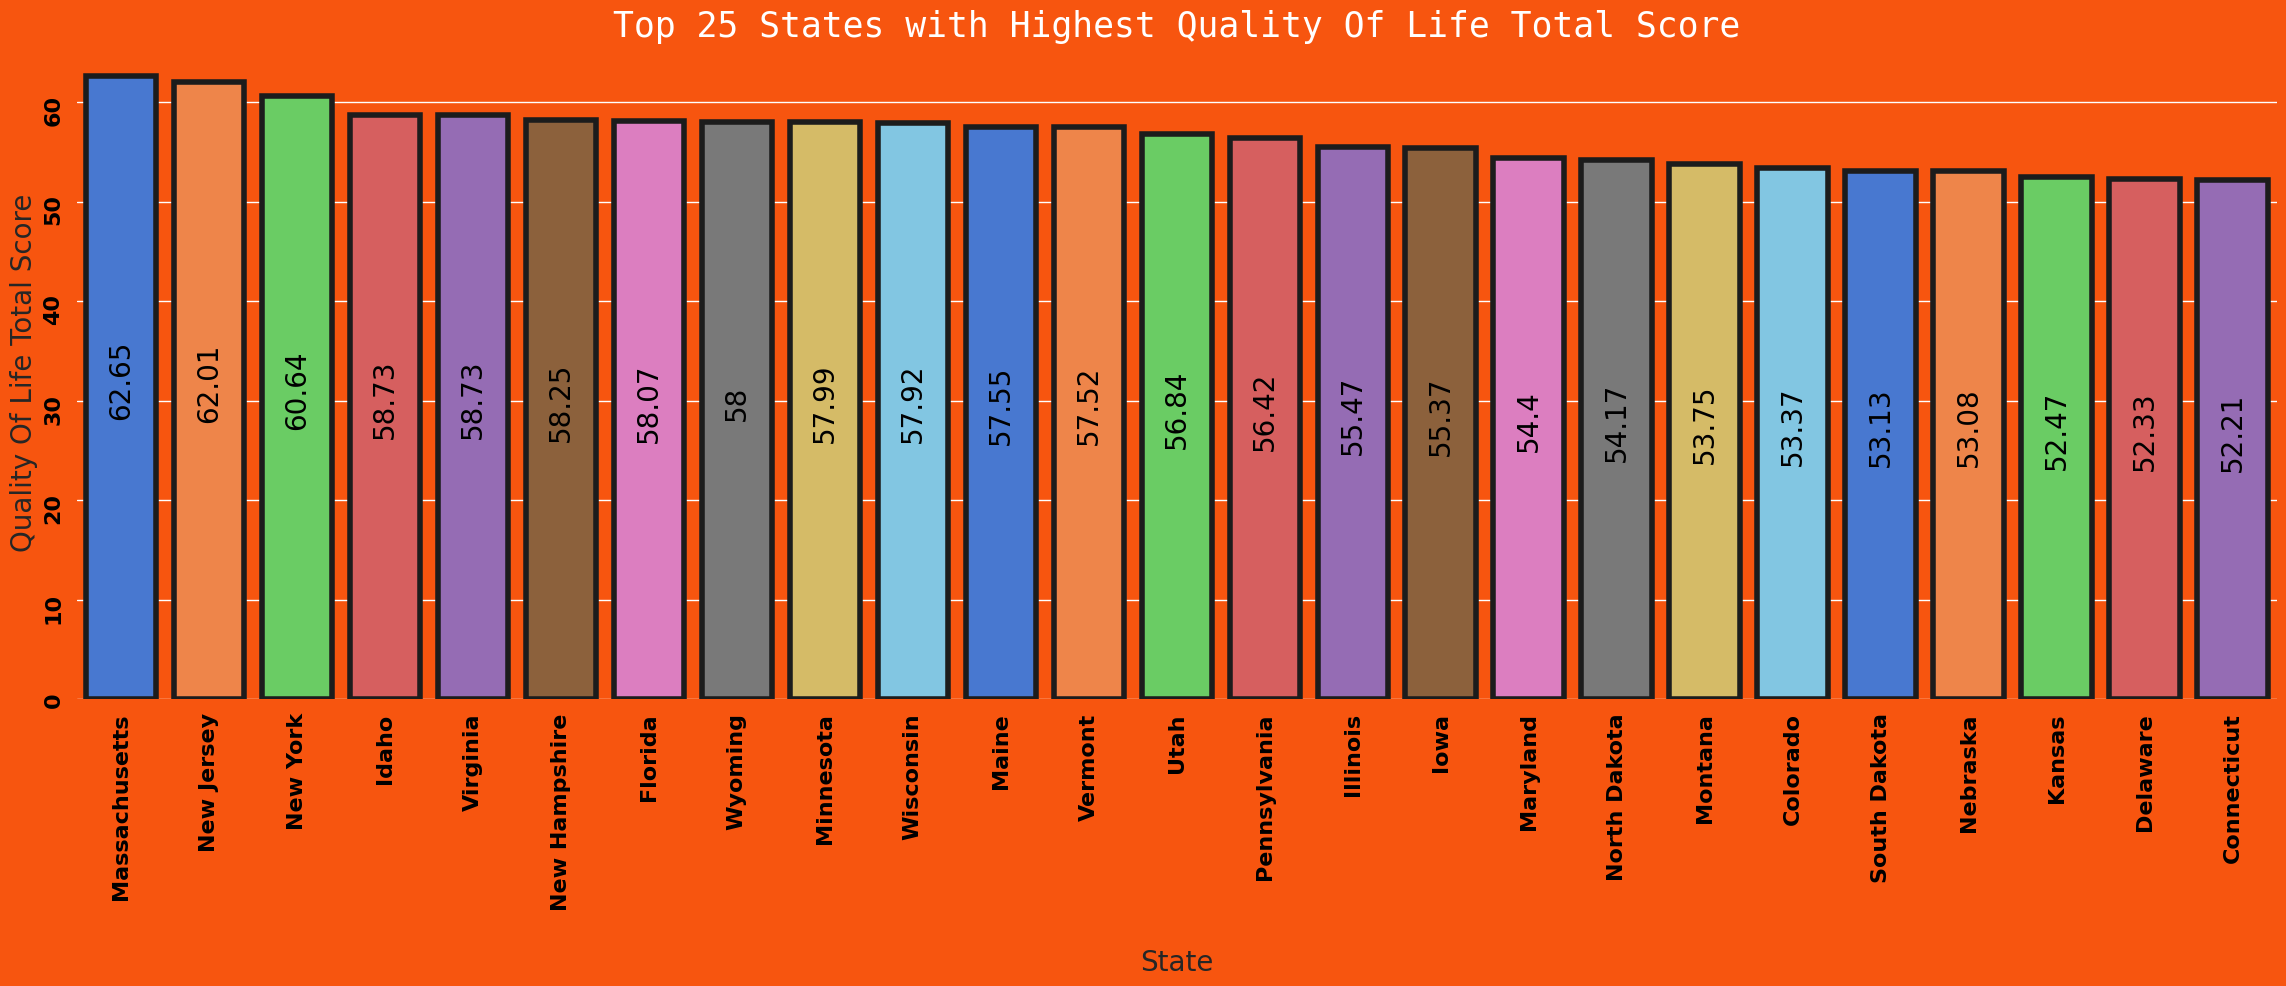

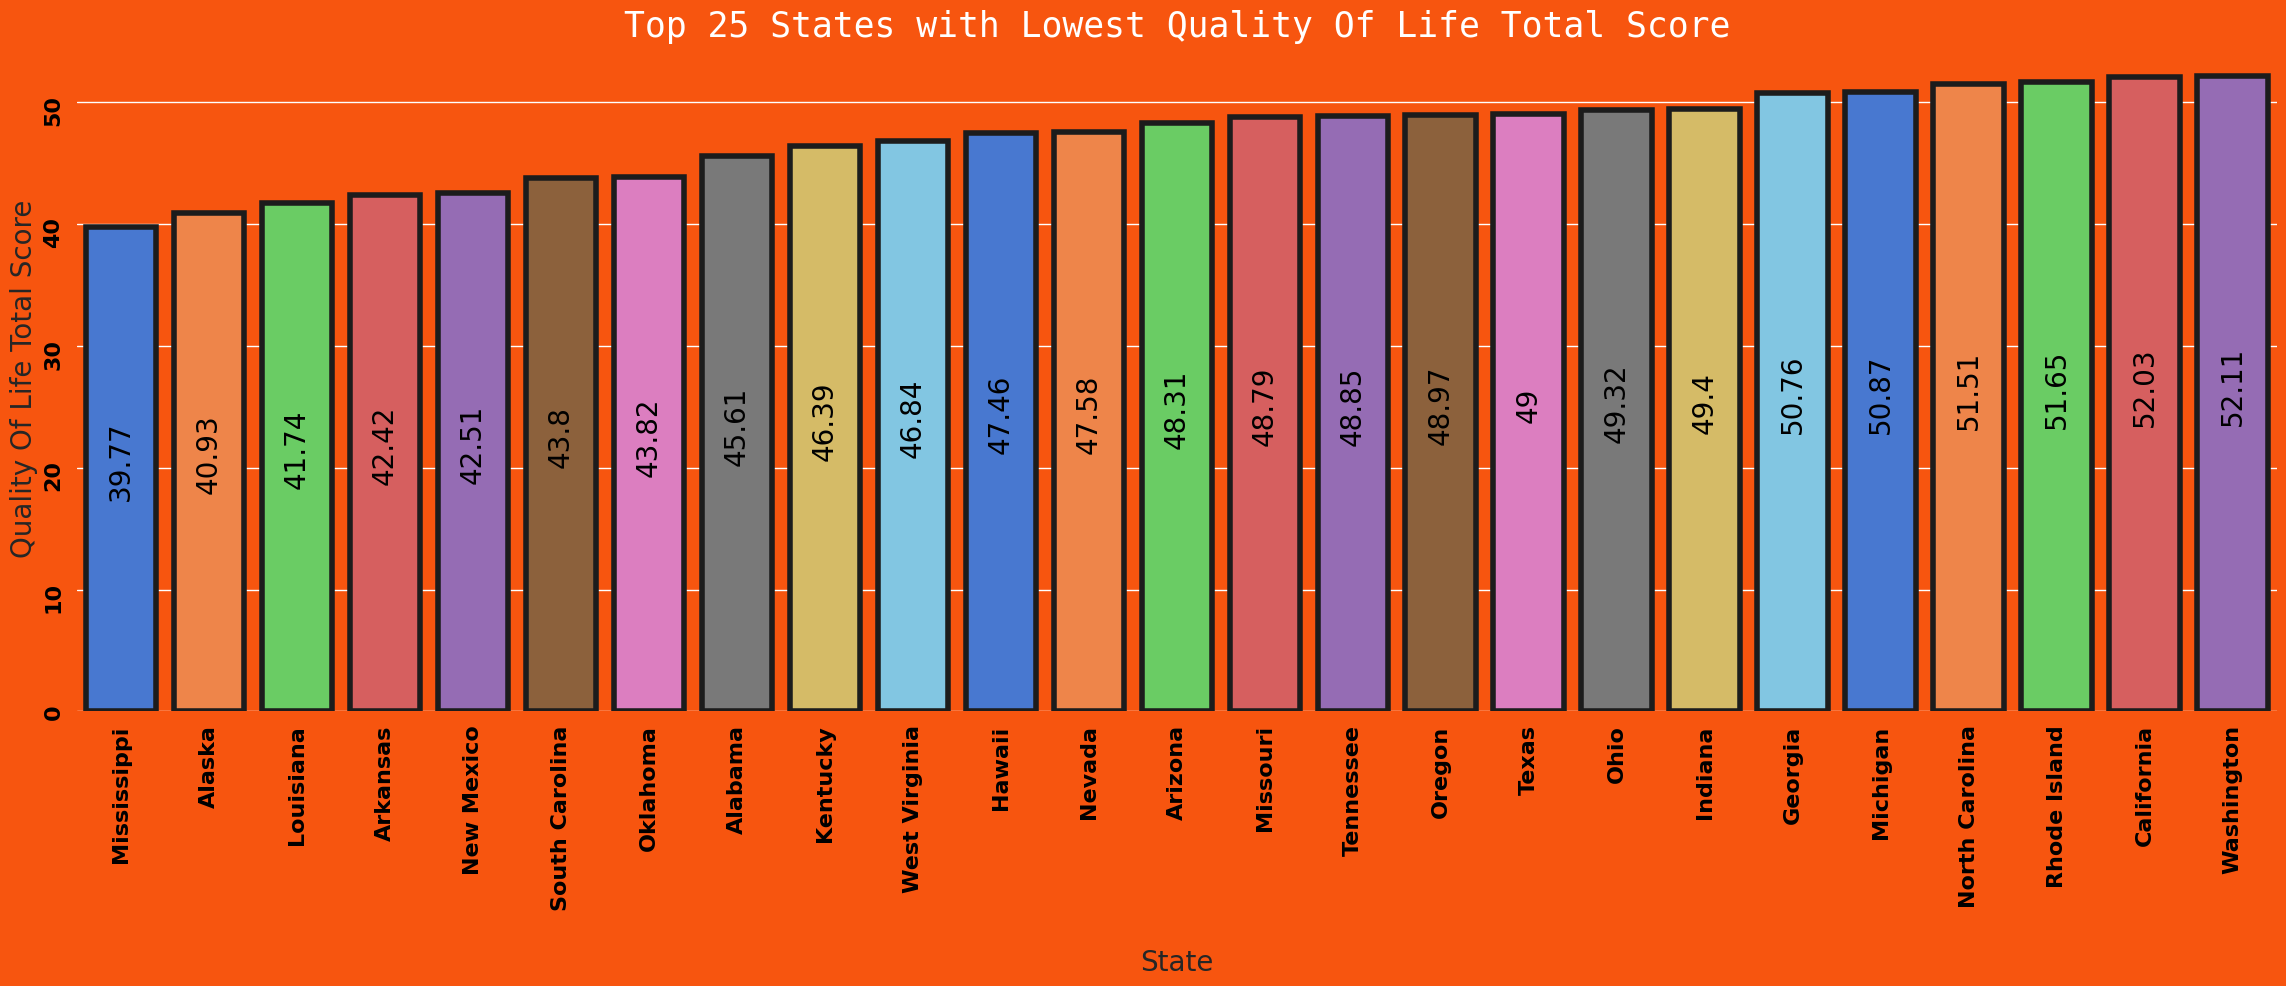

In [14]:
plot_quality_of_life(df, y_name="QualityOfLifeTotalScore")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 😊 Quality Of Life Score || ⬇️ Lowest 25 State </h1>

  <img src="https://i.postimg.cc/Kj5krb71/168831470-High-Res-56a904d85f9b58b7d0f75bad.jpg" alt="Quality of Life">

</div>

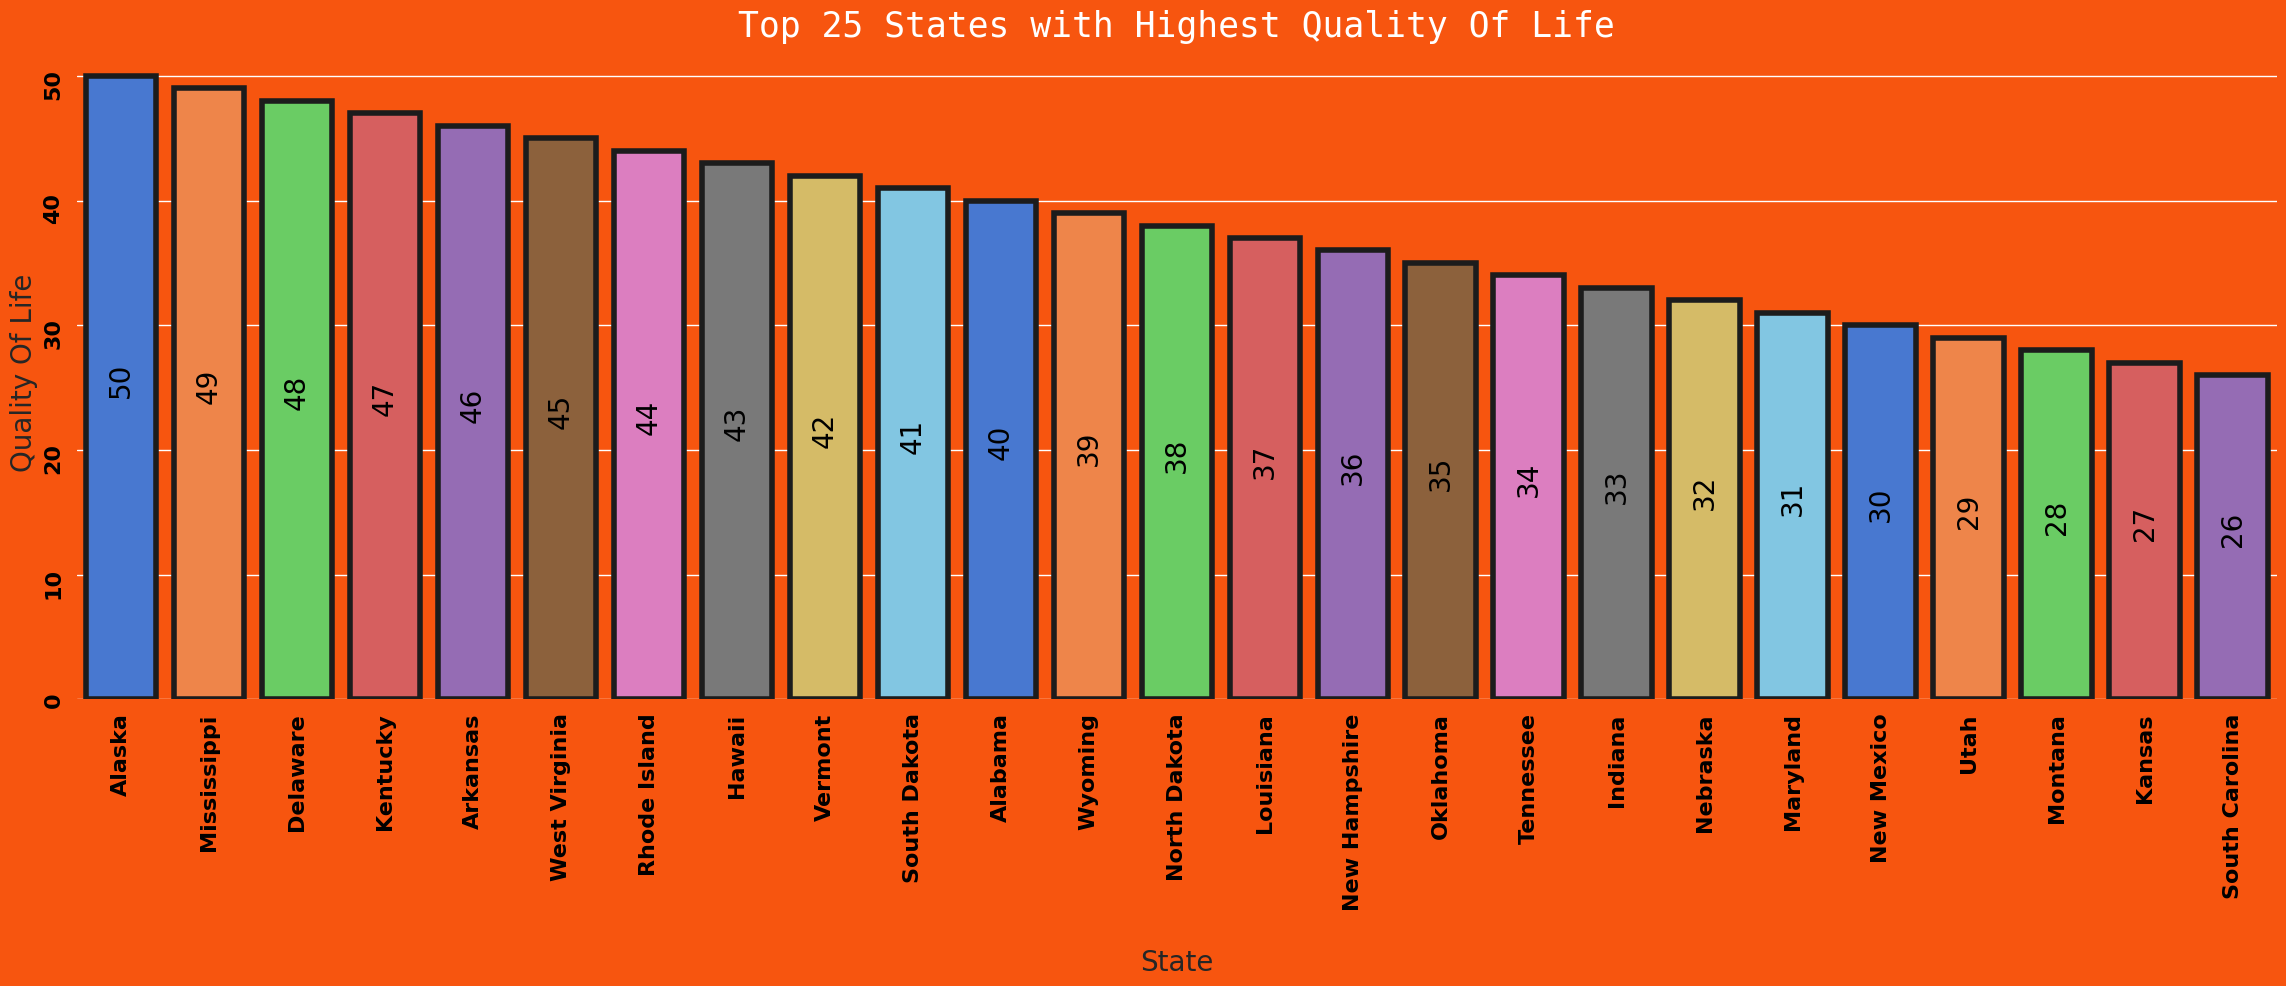

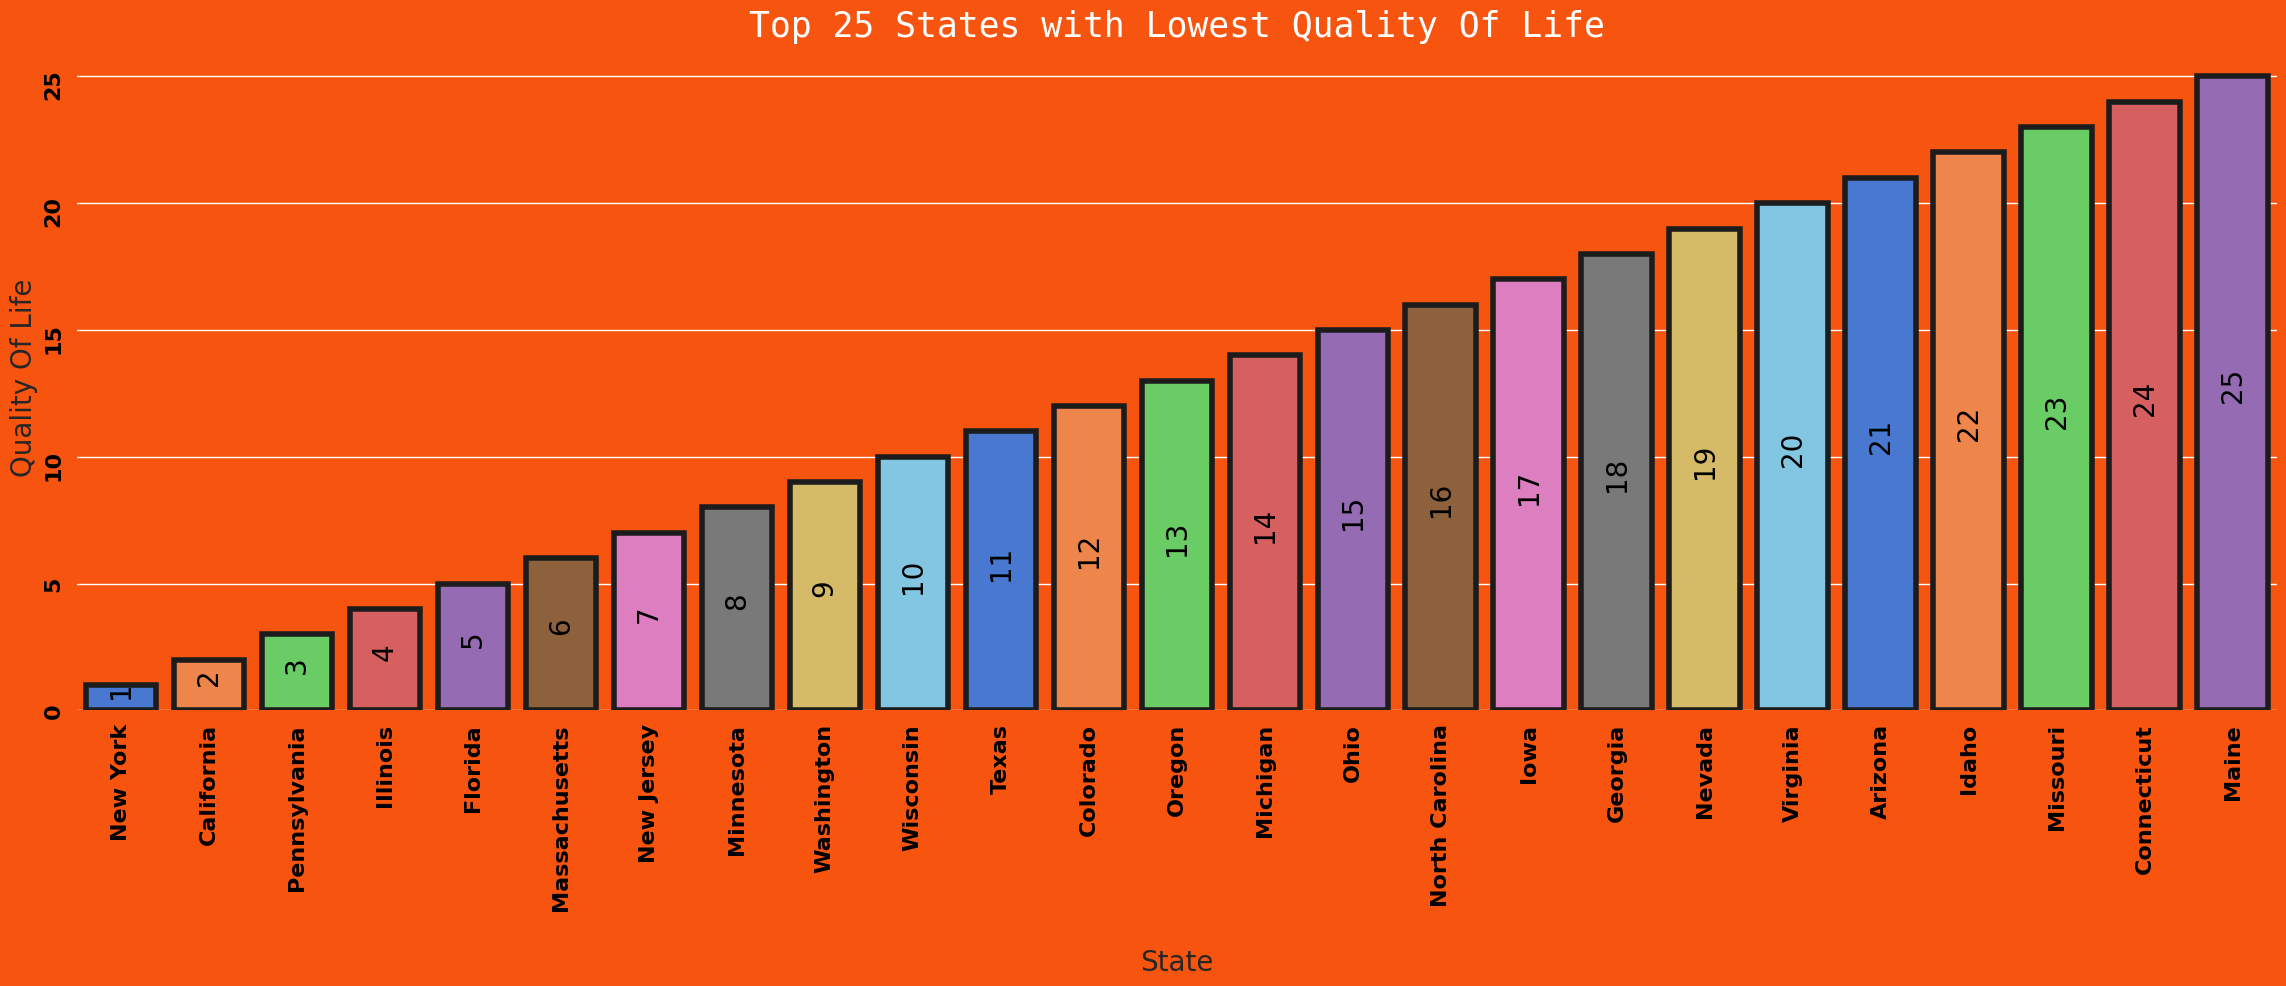

In [15]:
plot_quality_of_life(df, y_name="QualityOfLife")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 🤑 Quality Of Life Affordability || ⬇️ Lowest 25 State </h1>

  <img src="https://i.postimg.cc/W406dhYV/Can-we-ensure-everyone-has-an-affordable-life.jpg" alt="Quality of Life">

</div>

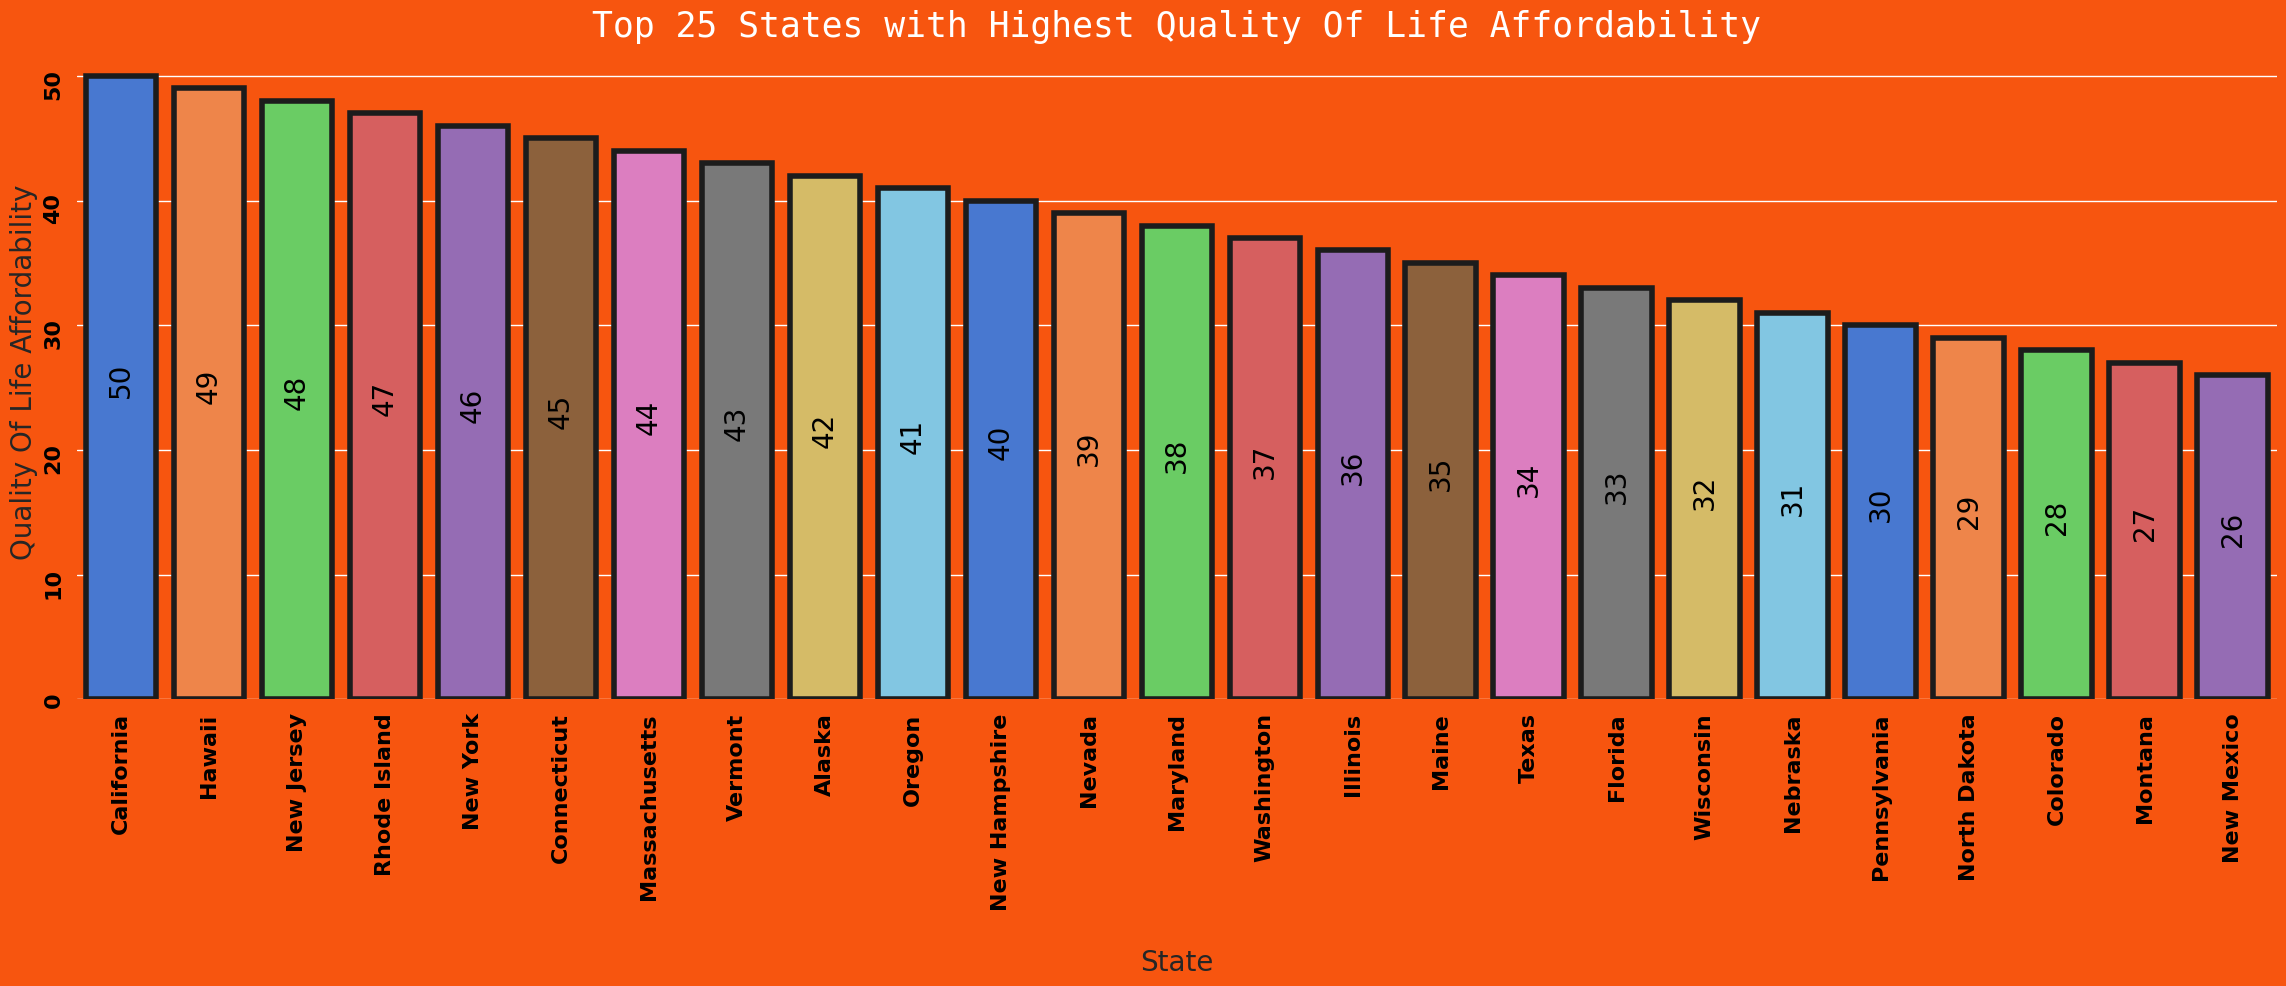

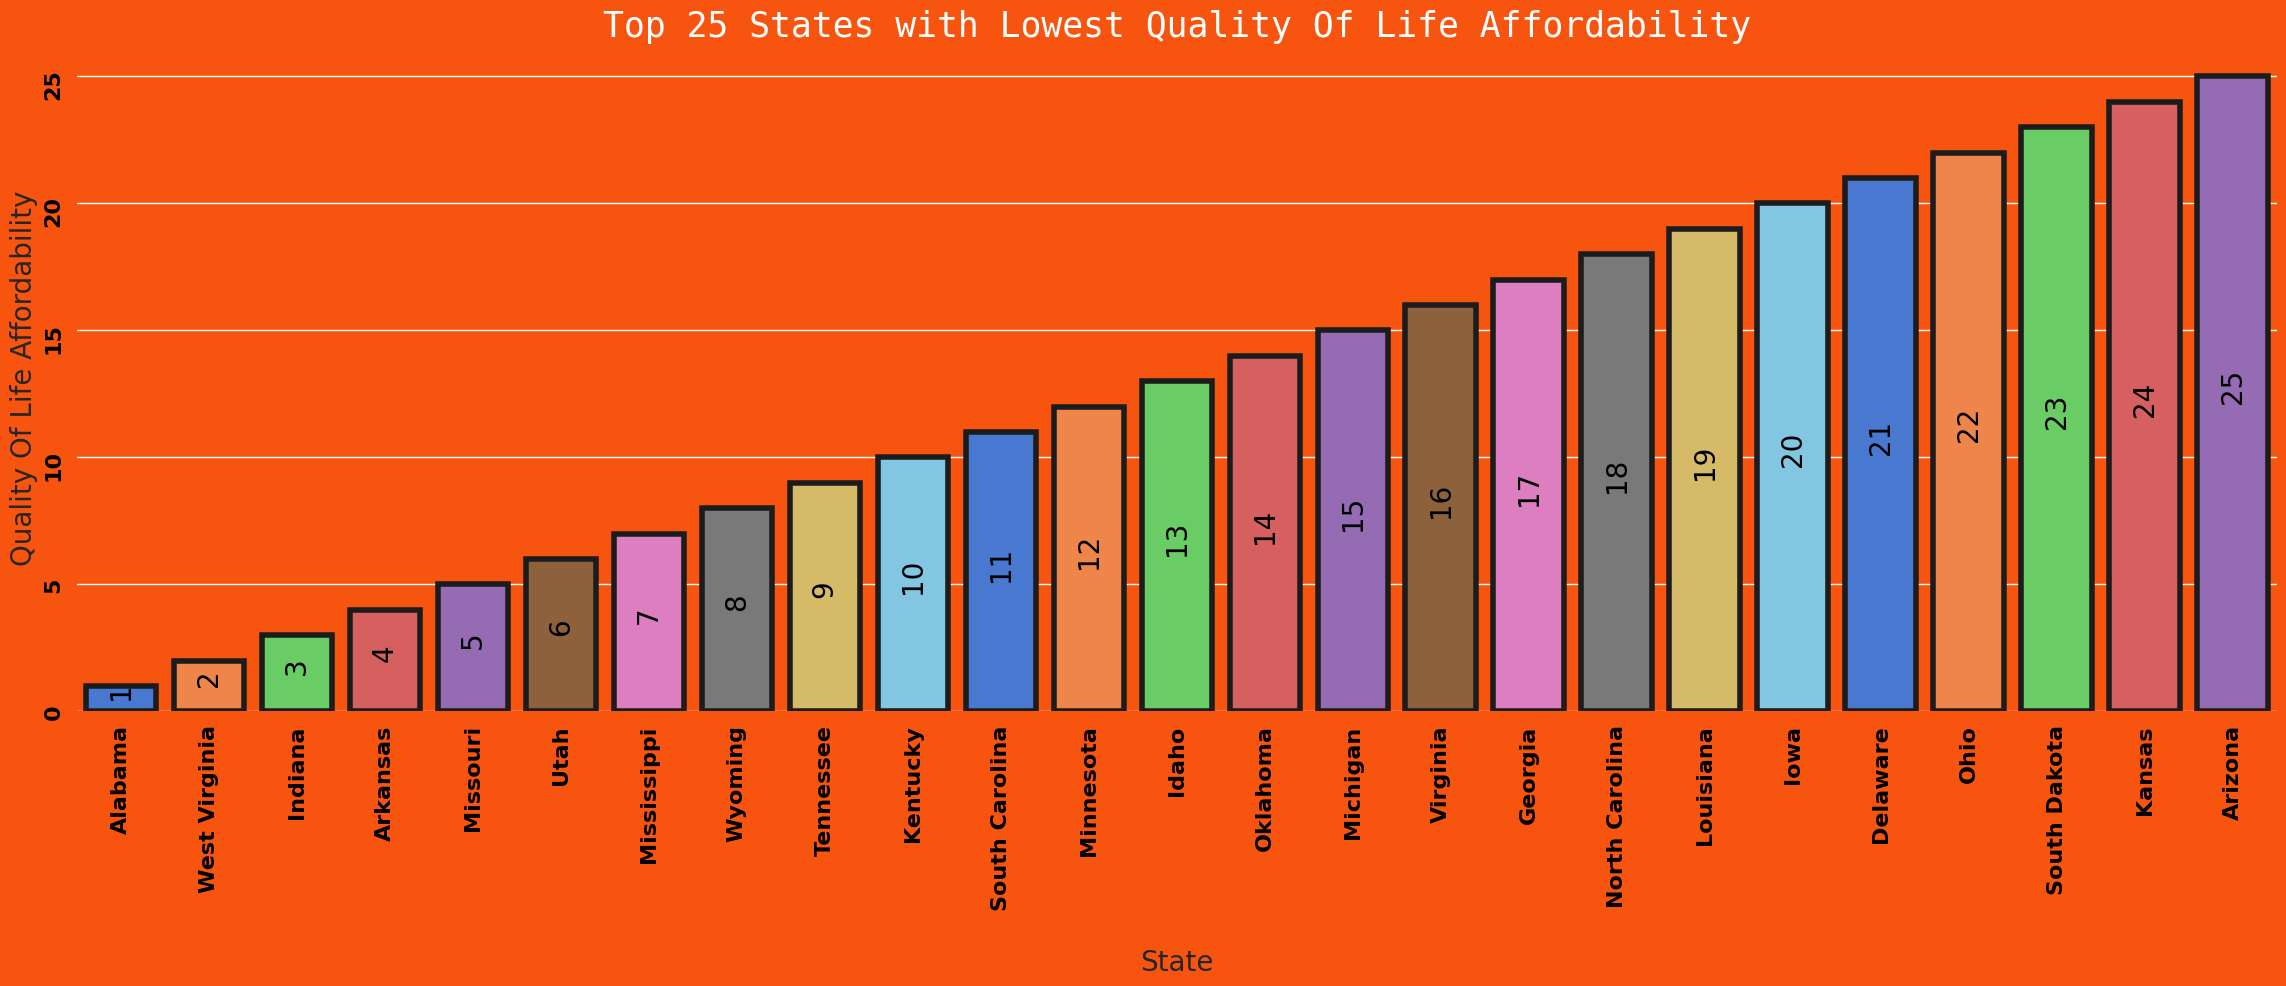

In [16]:
plot_quality_of_life(df, y_name="QualityOfLifeAffordability")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 💰 Quality Of Life Economy || ⬇️ Lowest 25 State </h1>

  <img src="https://i.postimg.cc/WbWPy4ns/127041-creating-livable-asian-cities-cover-1.jpg" alt="Quality of Life">

</div>

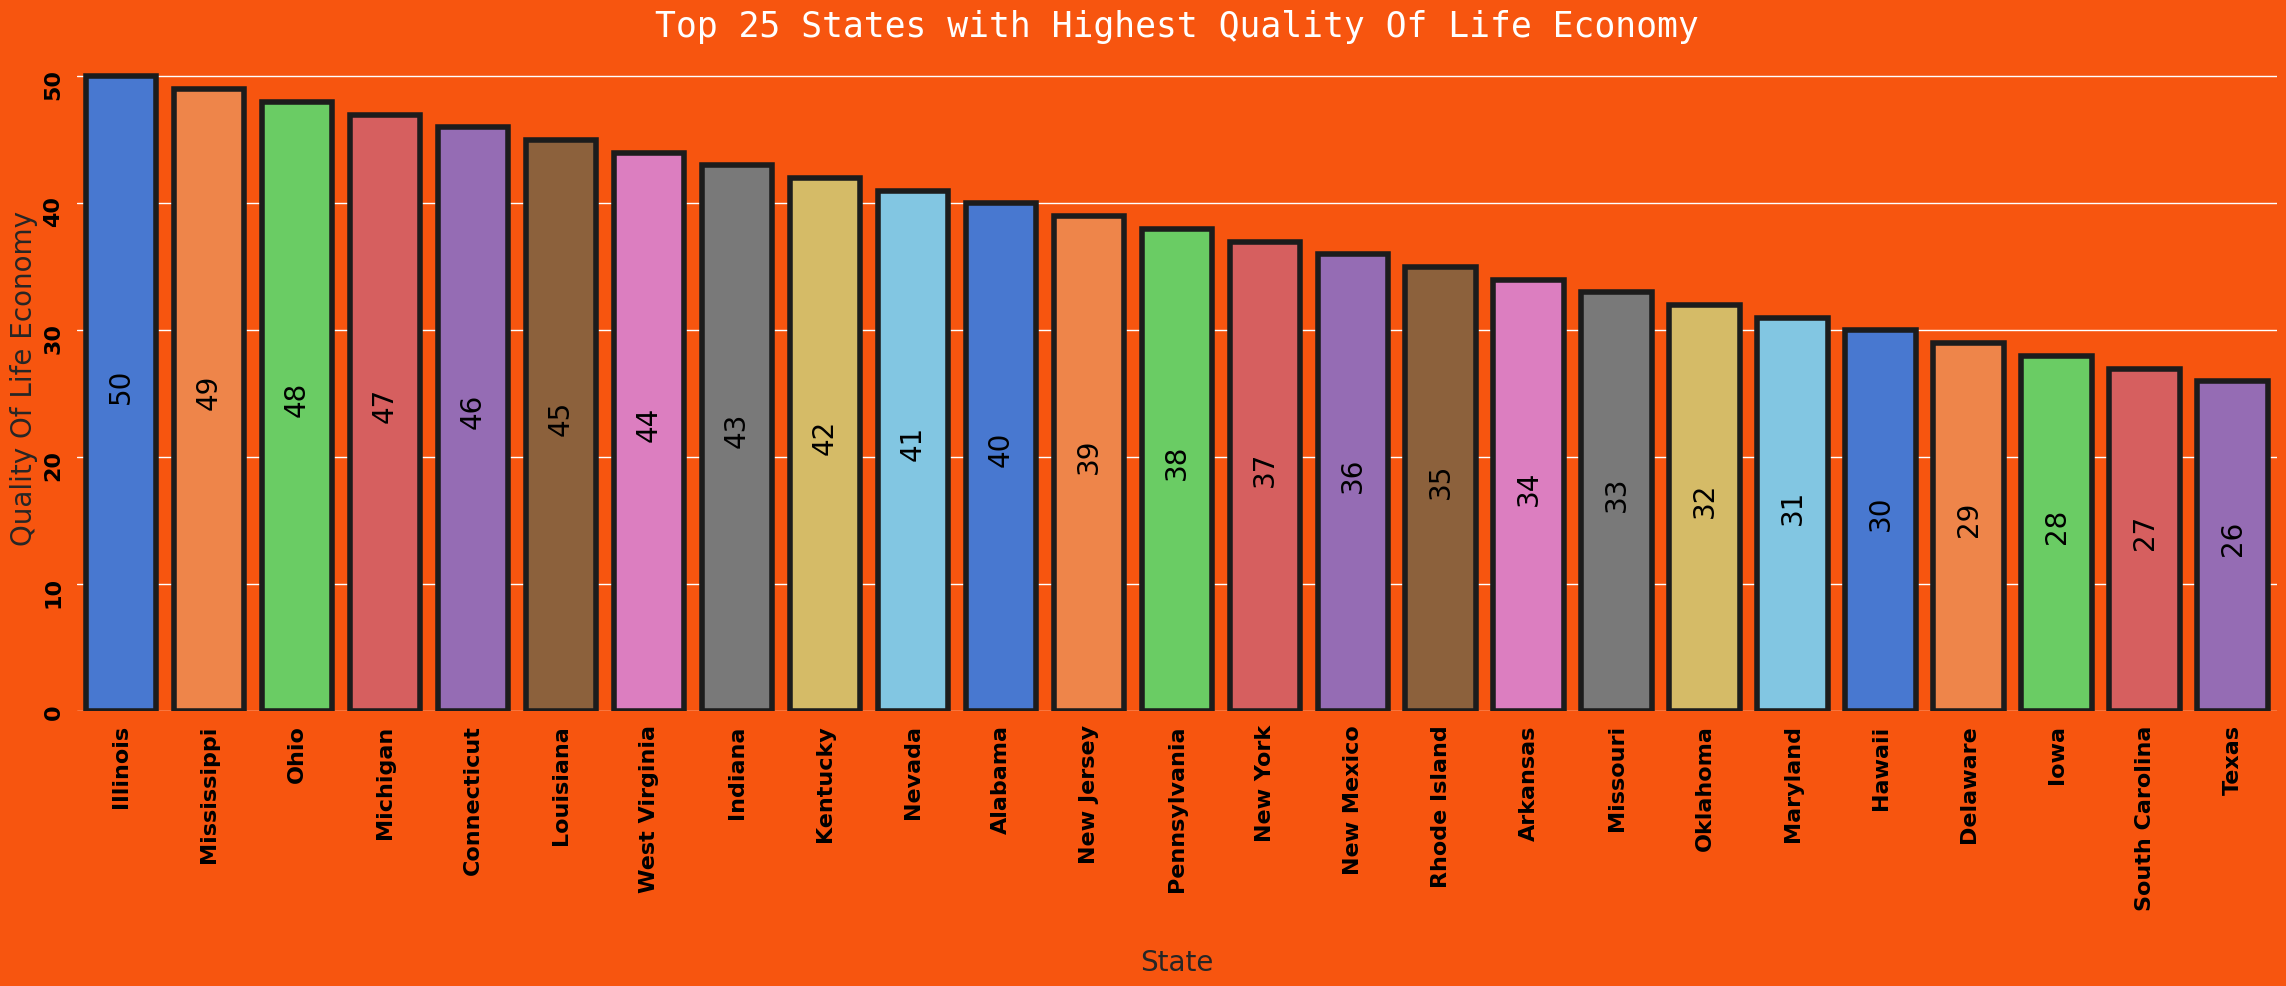

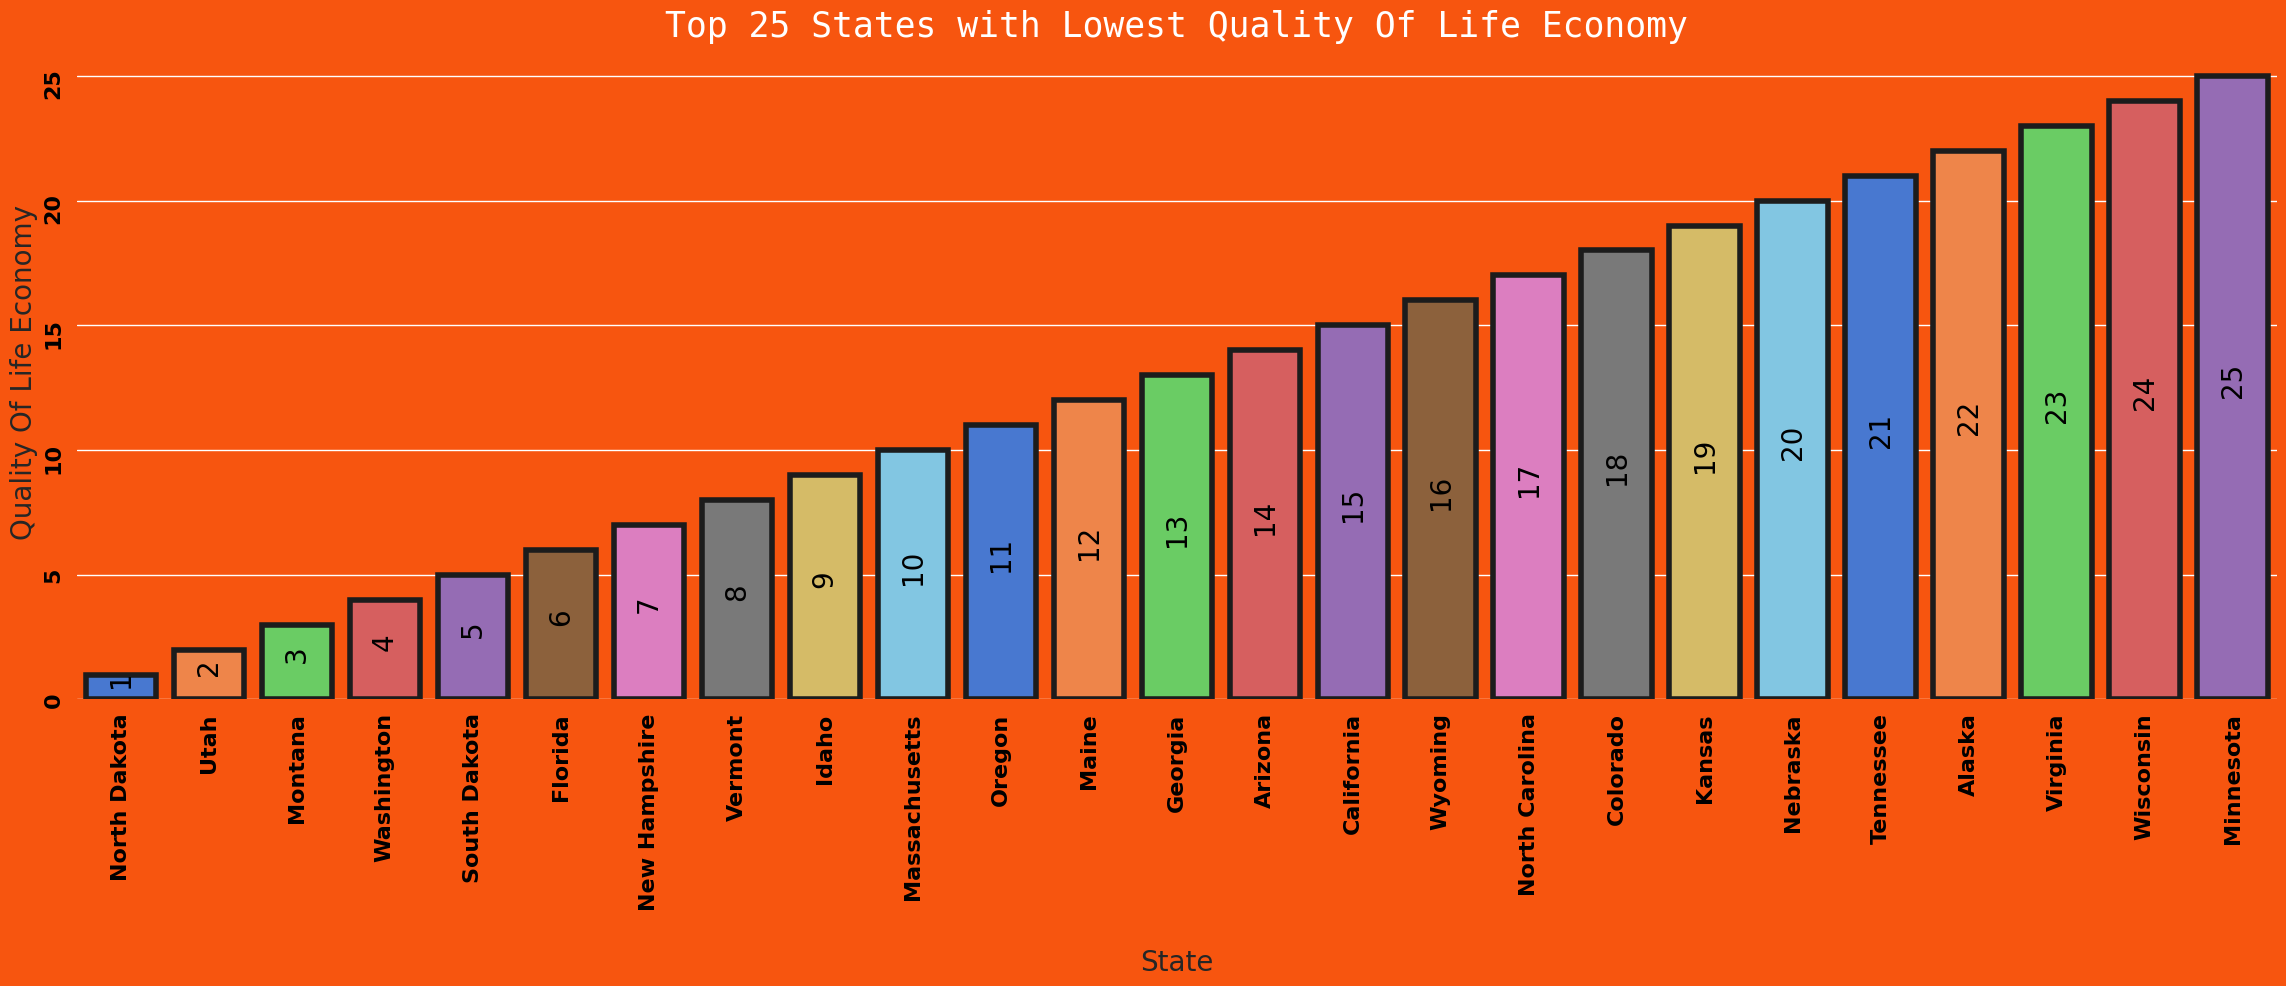

In [17]:
plot_quality_of_life(df, y_name="QualityOfLifeEconomy")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 🏫 Quality Of Education & Health || ⬇️ Lowest 25 State </h1>

  <img src="https://i.postimg.cc/HjGvqfV4/SDo-H-health-1024x853.png" alt="Quality of Life">

</div>

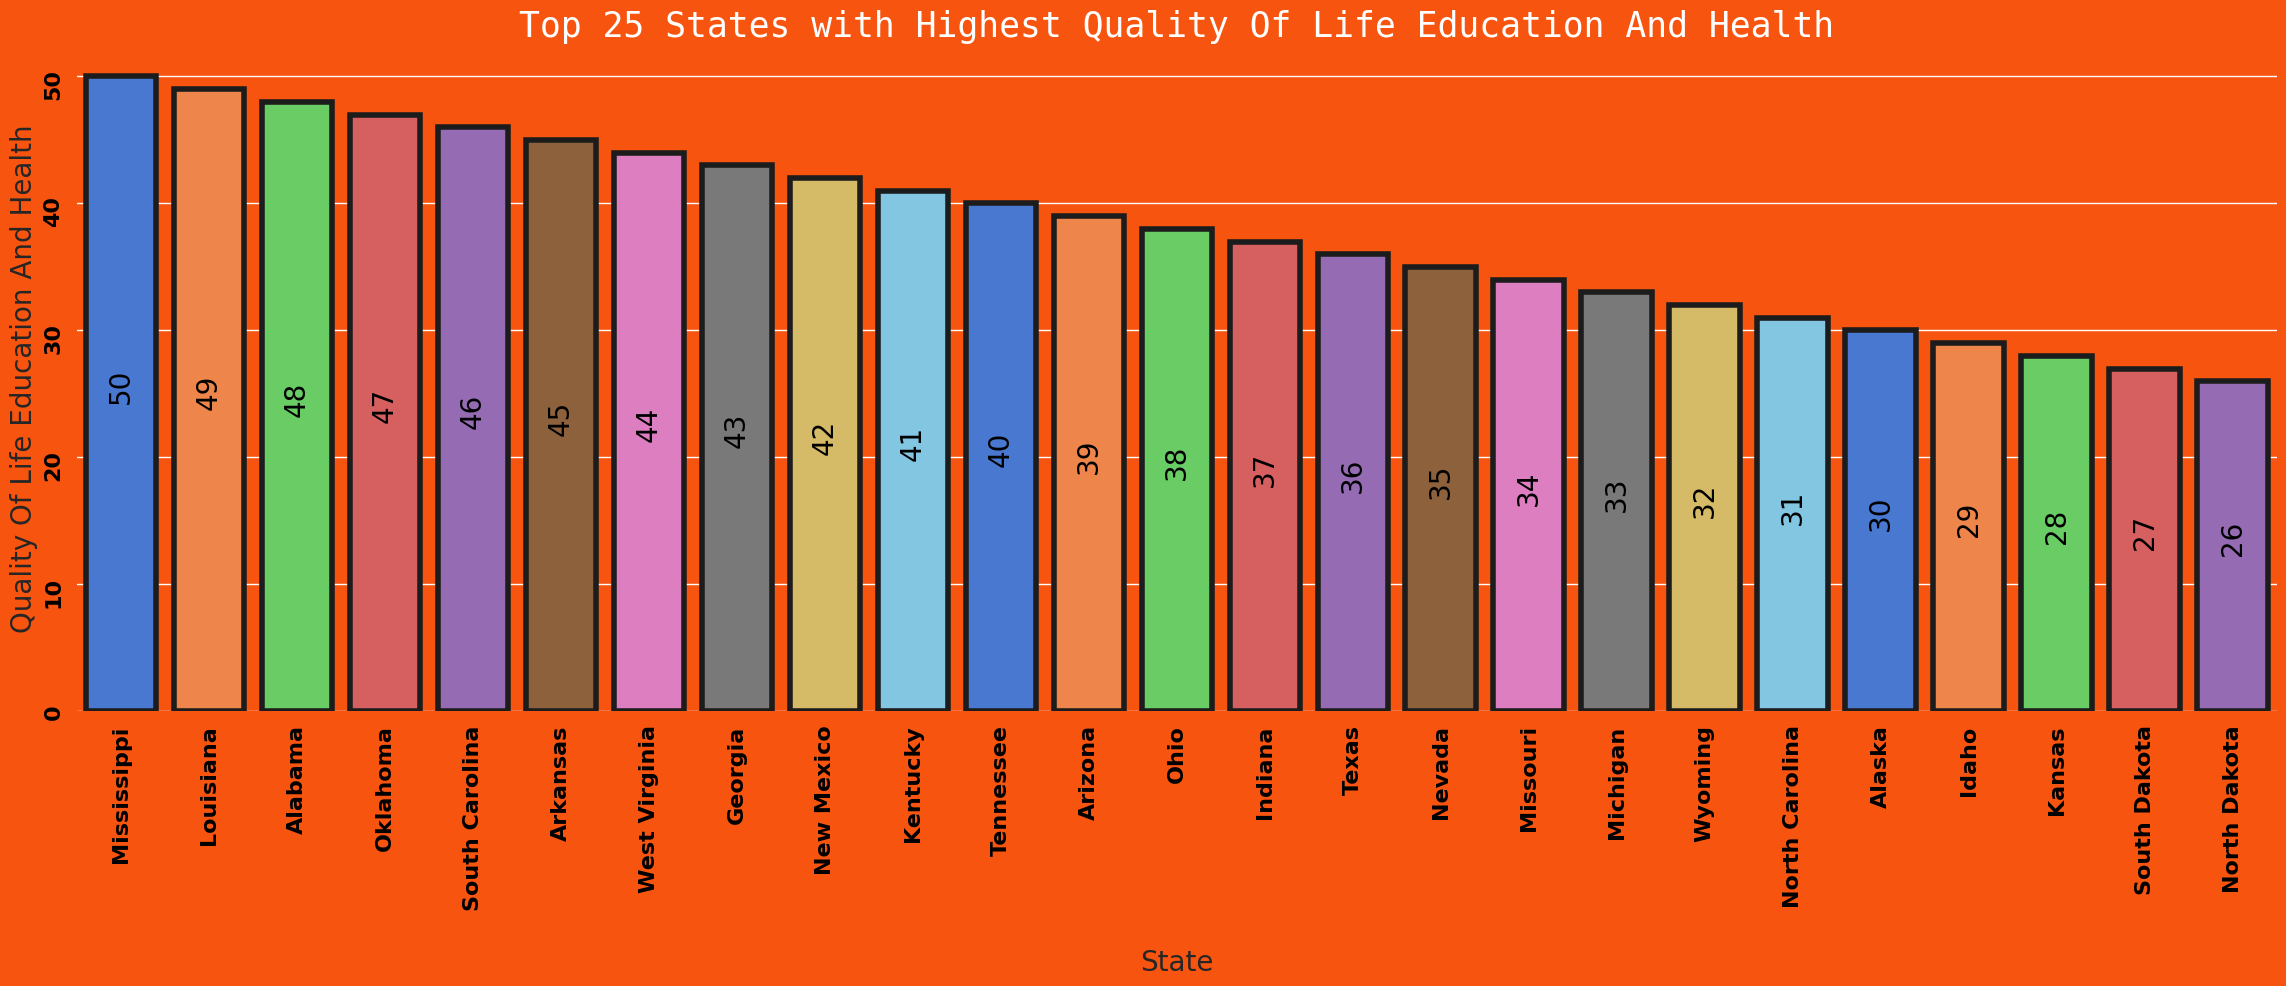

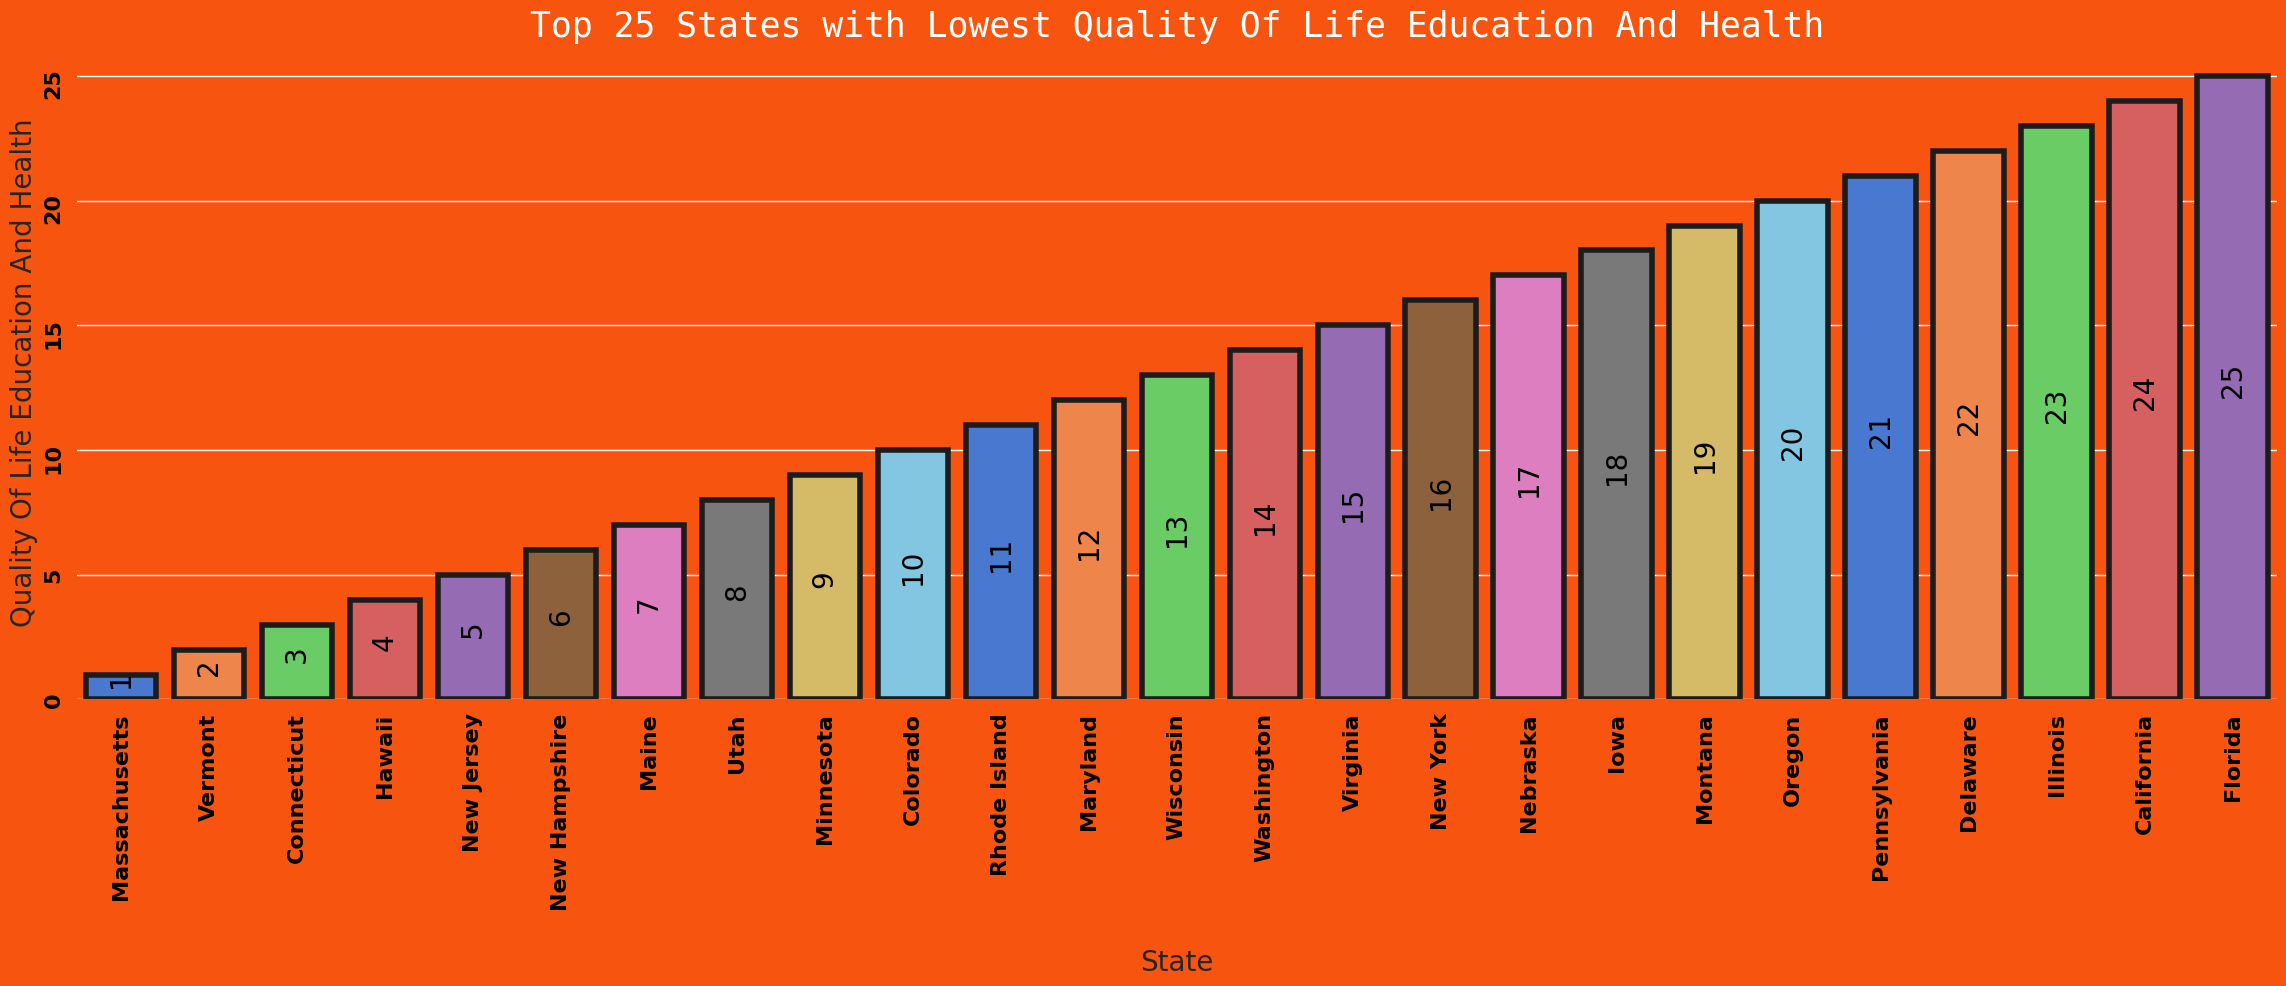

In [18]:
plot_quality_of_life(df, y_name="QualityOfLifeEducationAndHealth")

<div style="text-align: center; font-family: JetBrains Mono; font-weight: bold;">

  <h1 style="font-size: 200%;">🔝 Top 25 State || 🦺 Quality Of Life Safety || ⬇️ Lowest 25 State </h1>

  <img src="https://i.postimg.cc/gc5Bf6hc/Moms-052622-Photo-rapid-response-rally-DC19-640x360.jpg" alt="Quality of Life">

</div>

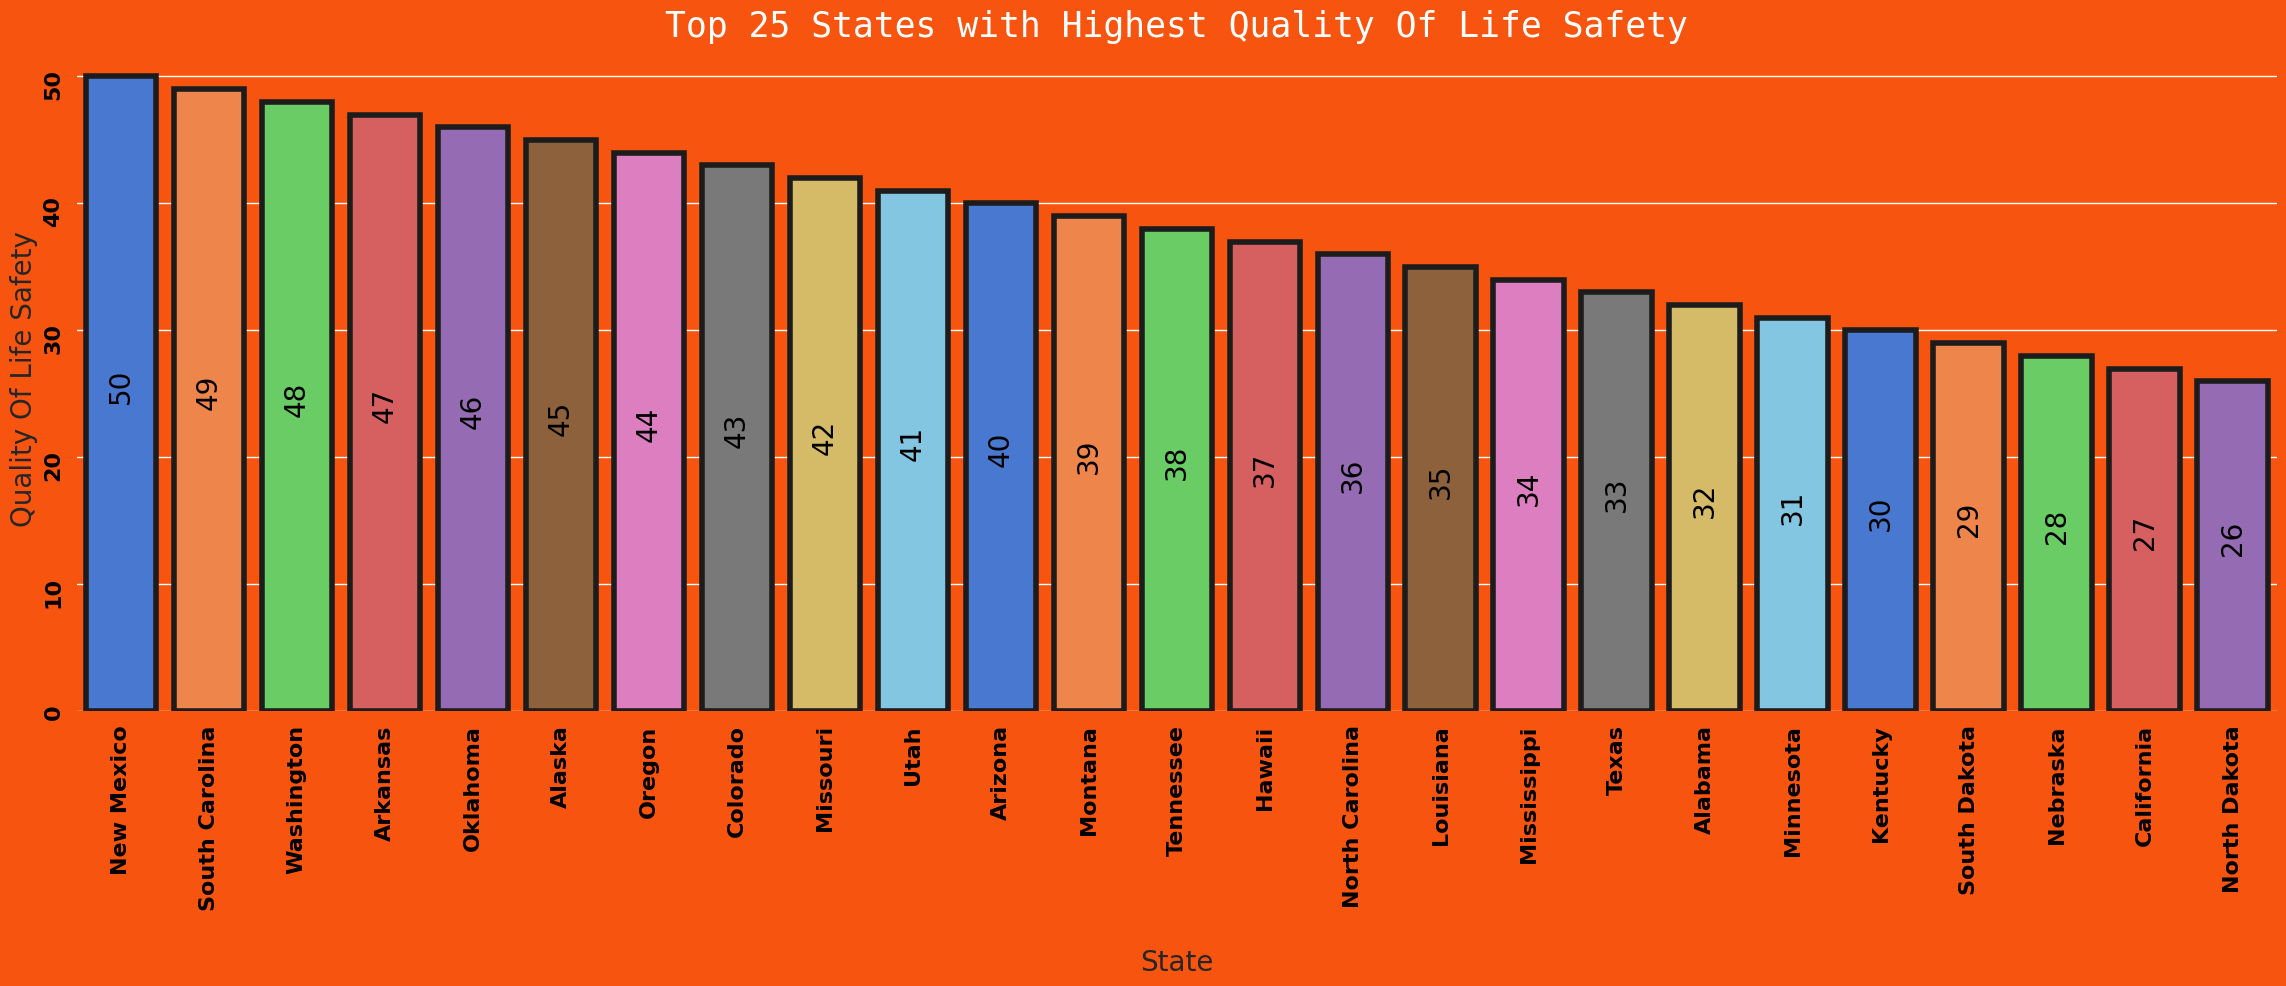

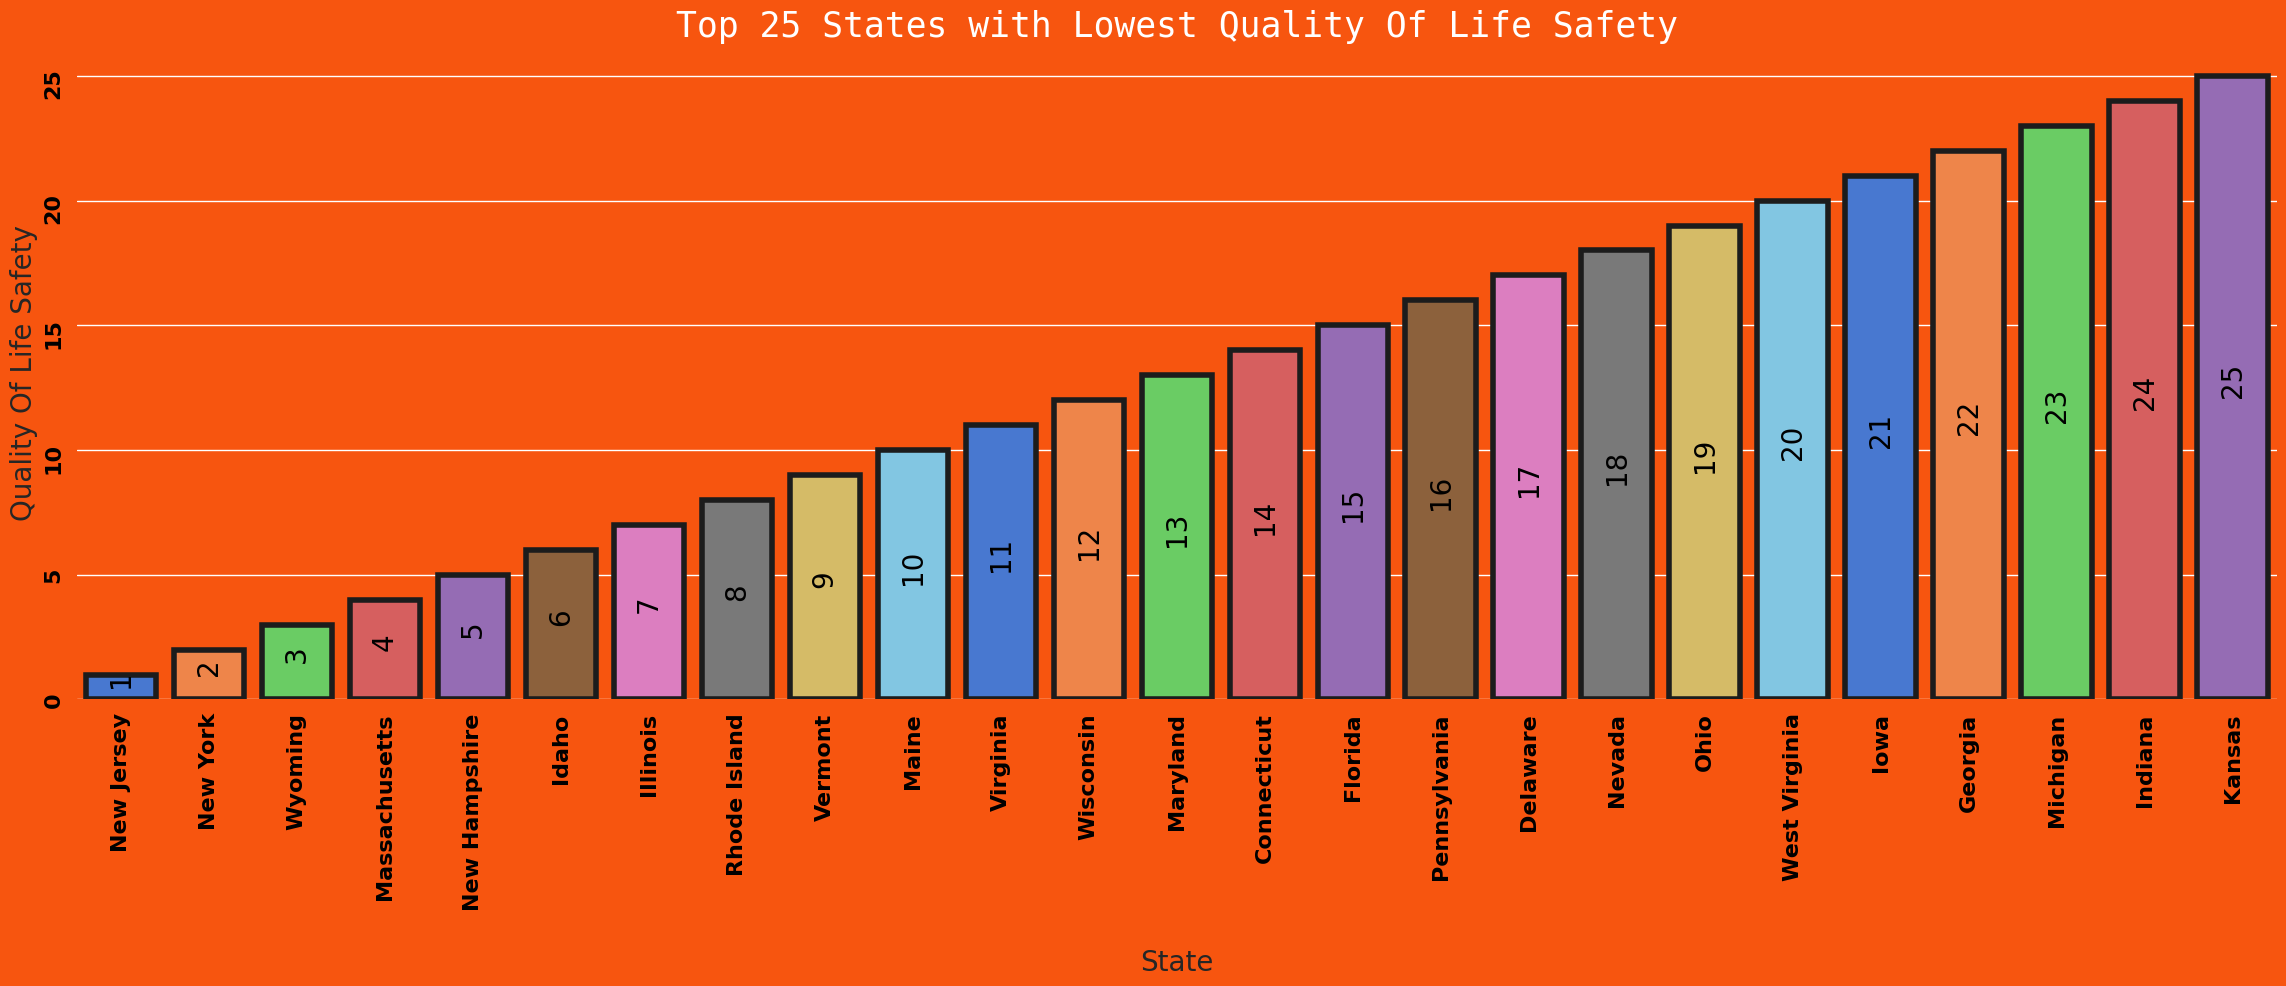

In [19]:
plot_quality_of_life(df, y_name="QualityOfLifeSafety")

<h1 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 1px; color:#17279c; font-size:200%; text-align:left;padding: 0px; border-bottom: 3px solid #17279c;"></h1>
<a class='anchor' id='pytorch'></a>
<center style="font-family: JetBrains Mono; font-weight: bold; font-size: 100px;"><i>╚»END«╝
</i></center>
<h1 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 1px; color:#17279c; font-size:200%; text-align:left;padding: 0px; border-bottom: 3px solid #17279c;"></h1>
<a class='anchor' id='pytorch'></a>

<h1 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 1px; color:#ef4b28; font-size:200%; text-align:left;padding: 0px; border-bottom: 3px solid #ef4b28;">✍️ Author Details</h1> <a class='anchor' id='pytorch'></a>

<div class="author-card" style="border: 2px solid #DAA03DFF; padding: 10px; max-width: 400px; text-align: center; margin: 0 auto;">
  <h1 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 1px; color:#80cff1; font-size:200%; text-align:center; padding: 0px; border-bottom: 3px solid #80cff1;">Jahid Hasan</h1>
  <a class='anchor' id='tps'></a>
  <div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-avatars/images/1937611-kg.jpg?t=2024-05-13-03-31-28&quot" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #5388d0; margin-bottom: 10px;">
  </div>
  <a href="https://github.com/msjahid/"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a>
  <div style="margin-bottom: 5px;"></div>
  <a href="https://www.linkedin.com/in/msjahid/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a>
  <div style="margin-bottom: 5px;"></div>
  <a href="mailto:msjahid.ai@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a>
  <div style="margin-bottom: 5px;"></div>
  <a href="https://t.me/msjahid"><img src="https://img.shields.io/badge/Telegram-Contact%20Me-blue?style=for-the-badge&logo=telegram" alt="Telegram"/></a>
  <div style="margin-bottom: 5px;"></div>
  <a href="https://medium.com/@msjahid"><img src="https://img.shields.io/badge/Medium-Follow%20Me-green?style=for-the-badge&logo=medium" alt="Medium"/></a>
  <div style="margin-bottom: 5px;"></div>
  <a href="https://msjahid.github.io/"><img src="https://img.shields.io/badge/Website-Portfolio-purple?style=for-the-badge&logo=website" alt="Website"/></a>
</div>

<style>
    .author-card {
        border: 2px solid #DAA03DFF;
        padding: 10px;
        max-width: 400px;
        text-align: center;
        margin: 0 auto;
        transition: transform 0.3s ease; /* Adding transition for smooth transform */
    }

    .author-card:hover {
        transform: translateY(-5px); /* Move the element 5px up on hover */
    }

    /* Additional styles can go here if needed */
</style>

<div style="margin: 0 auto; max-width: 800px;">
    <div style="background-image: url('https://i.postimg.cc/mkd3kfhV/cf90bb1b741ff44adde054a2e12b82e6.gif');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: Arial, sans-serif; /* Changed font family */
                border: 4px solid #FF5733; /* Changed border color */
                border-radius: 20px;
                color: #DAA03DFF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #FF5733;">Upvote, please ❔  Enjoyed : not</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>